In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:

# Load your dataset
df = pd.read_csv(r"C:\Users\71591\Desktop\dataset\Tourist Numbers Univariate Forecasting Dataset.csv", parse_dates=['Date'], index_col='Date')

# Ensure the index is a datetime index
df.index = pd.to_datetime(df.index)

# Check the data
df.head()


C:\Users\71591\AppData\Local\Temp\ipykernel_25756\1043012220.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(r"C:\Users\71591\Desktop\dataset\Tourist Numbers Univariate Forecasting Dataset.csv", parse_dates=['Date'], index_col='Date')


,TouristNumber
Date,
1970-01-01 00:00:00.000033604,8414
1970-01-01 00:00:00.000033635,9767
1970-01-01 00:00:00.000033664,13805
1970-01-01 00:00:00.000033695,12987
1970-01-01 00:00:00.000033725,32190


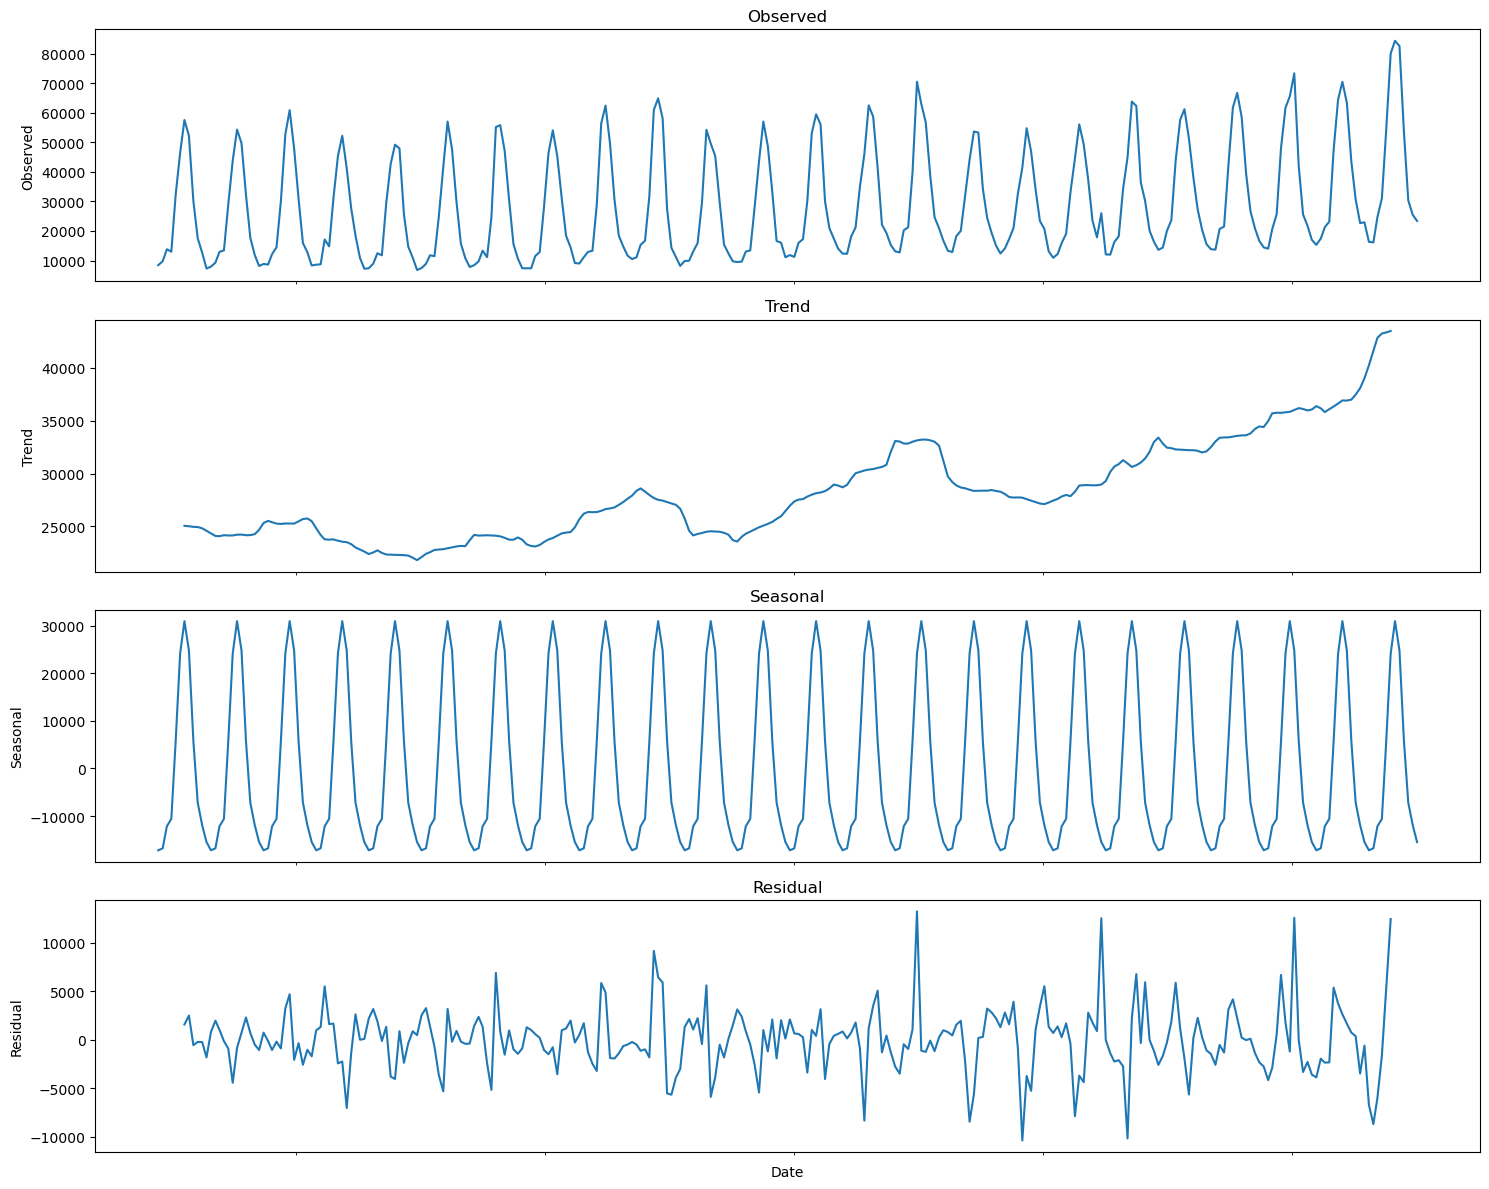

In [3]:
# Decompose the time series
result = seasonal_decompose(df['TouristNumber'], model='additive', period=12)  # period=12 for monthly data with yearly seasonality

# Plot the decomposed components
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15, 12), sharex=True)

result.observed.plot(ax=ax1, title='Observed')
ax1.set_ylabel('Observed')

result.trend.plot(ax=ax2, title='Trend')
ax2.set_ylabel('Trend')

result.seasonal.plot(ax=ax3, title='Seasonal')
ax3.set_ylabel('Seasonal')

result.resid.plot(ax=ax4, title='Residual')
ax4.set_ylabel('Residual')
ax4.set_xlabel('Date')

plt.tight_layout()
plt.show()

In [4]:
# Adding lag features to the DataFrame
for i in range(1,20):  # Creating lag features
    df[f'Lag_{i}'] = df['TouristNumber'].shift(i)

# Drop rows with NaN values resulting from creating lag features
df.dropna(inplace=True)

# Display the first few rows of the dataframe after adding lag features
df.head()

,TouristNumber,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5,Lag_6,Lag_7,Lag_8,Lag_9,Lag_10,Lag_11,Lag_12,Lag_13,Lag_14,Lag_15,Lag_16,Lag_17,Lag_18,Lag_19
Date,,,,,,,,,,,,,,,,,,,,
1970-01-01 00:00:00.000034182,49702,54320.0,43848.0,28900.0,13432.0,12934.0,9283.0,7939.0,7285.0,12651.0,17522.0,30125.0,52261.0,57570.0,46383.0,32190.0,12987.0,13805.0,9767.0,8414.0
1970-01-01 00:00:00.000034213,32182,49702.0,54320.0,43848.0,28900.0,13432.0,12934.0,9283.0,7939.0,7285.0,12651.0,17522.0,30125.0,52261.0,57570.0,46383.0,32190.0,12987.0,13805.0,9767.0
1970-01-01 00:00:00.000034243,17691,32182.0,49702.0,54320.0,43848.0,28900.0,13432.0,12934.0,9283.0,7939.0,7285.0,12651.0,17522.0,30125.0,52261.0,57570.0,46383.0,32190.0,12987.0,13805.0
1970-01-01 00:00:00.000034274,11833,17691.0,32182.0,49702.0,54320.0,43848.0,28900.0,13432.0,12934.0,9283.0,7939.0,7285.0,12651.0,17522.0,30125.0,52261.0,57570.0,46383.0,32190.0,12987.0
1970-01-01 00:00:00.000034304,8146,11833.0,17691.0,32182.0,49702.0,54320.0,43848.0,28900.0,13432.0,12934.0,9283.0,7939.0,7285.0,12651.0,17522.0,30125.0,52261.0,57570.0,46383.0,32190.0


In [5]:
# Split the data into training and testing sets
train_size = int(0.8 * len(df))
train_data = df[:train_size]
test_data = df[train_size:]

# Define the input features (lag features) and target variable
x_train = train_data.drop(columns=['TouristNumber'])
y_train = train_data['TouristNumber']
x_test = test_data.drop(columns=['TouristNumber'])
y_test = test_data['TouristNumber']

# Display the shapes of the training and testing sets
x_train.shape, y_train.shape, x_test.shape, y_test.shape


((215, 19), (215,), (54, 19), (54,))

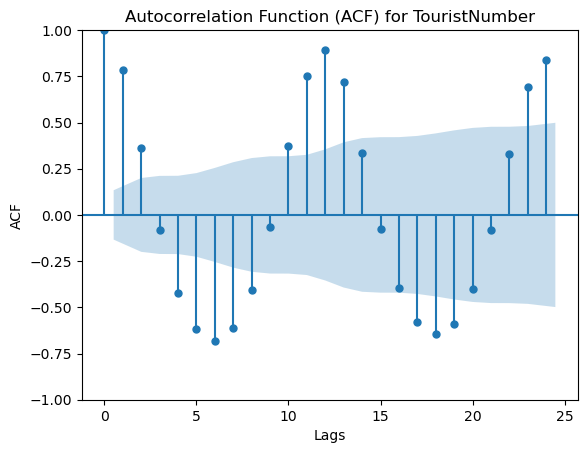

In [6]:
from statsmodels.graphics.tsaplots import plot_acf

# Plot the ACF for the number of TouristNumber in the training set
plot_acf(y_train)
plt.title('Autocorrelation Function (ACF) for TouristNumber')
plt.xlabel('Lags')
plt.ylabel('ACF')
plt.show()


In [7]:
# Calculate and print the correlation between ######------# Plot the ACF for the number of TouristNumber in the training set
 ##and each lagged value------------------------#####
for i in range(1, 20):
    correlation = df['TouristNumber'].corr(df[f'Lag_{i}'])
    print(f"Correlation between #Passengers and Lag_{i}: {correlation:.4f}")

Correlation between #Passengers and Lag_1: 0.8146
Correlation between #Passengers and Lag_2: 0.4229
Correlation between #Passengers and Lag_3: -0.0127
Correlation between #Passengers and Lag_4: -0.3617
Correlation between #Passengers and Lag_5: -0.5675
Correlation between #Passengers and Lag_6: -0.6436
Correlation between #Passengers and Lag_7: -0.5785
Correlation between #Passengers and Lag_8: -0.3717
Correlation between #Passengers and Lag_9: -0.0222
Correlation between #Passengers and Lag_10: 0.4138
Correlation between #Passengers and Lag_11: 0.8007
Correlation between #Passengers and Lag_12: 0.9634
Correlation between #Passengers and Lag_13: 0.7945
Correlation between #Passengers and Lag_14: 0.4017
Correlation between #Passengers and Lag_15: -0.0366
Correlation between #Passengers and Lag_16: -0.3869
Correlation between #Passengers and Lag_17: -0.5889
Correlation between #Passengers and Lag_18: -0.6620
Correlation between #Passengers and Lag_19: -0.5941


In [10]:
#BUILDING THE MODEL 
from statsmodels.tsa.api import AutoReg
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

# Define lag order based on the ACF plot
lag_order = 12

# Create and train the autoregressive model
ar_model = AutoReg(y_train, lags=lag_order)
ar_results = ar_model.fit()


C:\Users\71591\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [11]:
# Make predictions on the test set
y_pred = ar_results.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1, dynamic=False)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

#Calculate R squared
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f'Mean Absolute Error: {mae:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'R Squared value: {r2:.2f}')

Mean Absolute Error: 4241.81
Root Mean Squared Error: 7032.00
R Squared value: 0.89


C:\Users\71591\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\71591\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\71591\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


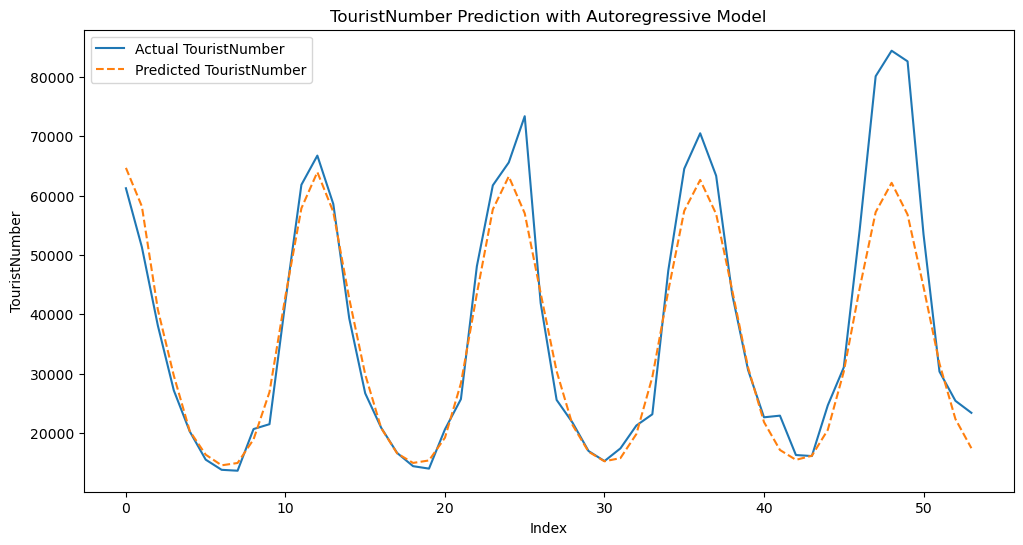

In [12]:
# Ensure the index for test_data is aligned correctly with y_pred
test_data.reset_index(drop=True, inplace=True)

# Visualize the results
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, y_test, label='Actual TouristNumber')
plt.plot(test_data.index, y_pred, label='Predicted TouristNumber', linestyle='--')
plt.xlabel('Index')
plt.ylabel('TouristNumber')
plt.legend()
plt.title('TouristNumber Prediction with Autoregressive Model')
plt.show()

C:\Users\71591\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\71591\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\71591\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


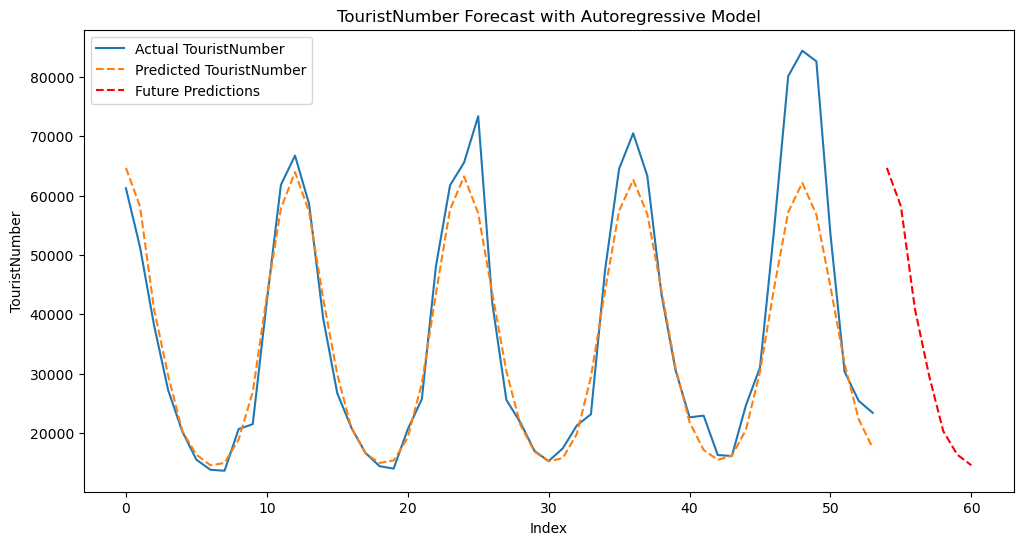

In [13]:
# Define the number of future time steps you want to predict
forecast_steps = 7

# Generate future indices
future_indices = range(len(y_test), len(y_test) + forecast_steps)

# Generate future predictions
future_predictions = ar_results.predict(start=len(train_data), end=len(train_data) + forecast_steps - 1, dynamic=False)

# Plot the actual data, existing predictions, and future predictions
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_test)), y_test, label='Actual TouristNumber')
plt.plot(range(len(y_test)), y_pred, label='Predicted TouristNumber', linestyle='--')
plt.plot(future_indices, future_predictions[-forecast_steps:], label='Future Predictions', linestyle='--', color='red')
plt.xlabel('Index')
plt.ylabel('TouristNumber')
plt.legend()
plt.title('TouristNumber Forecast with Autoregressive Model')
plt.show()

MA

In [14]:
# Calculate Moving Average (SMA)
df['SMA3'] = df['TouristNumber'].rolling(3).mean()

# Remove NULL values
df.dropna(inplace=True)

# Print DataFrame
df

,TouristNumber,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5,Lag_6,Lag_7,Lag_8,Lag_9,...,Lag_11,Lag_12,Lag_13,Lag_14,Lag_15,Lag_16,Lag_17,Lag_18,Lag_19,SMA3
Date,,,,,,,,,,,,,,,,,,,,,
1970-01-01 00:00:00.000034243,17691,32182.0,49702.0,54320.0,43848.0,28900.0,13432.0,12934.0,9283.0,7939.0,...,12651.0,17522.0,30125.0,52261.0,57570.0,46383.0,32190.0,12987.0,13805.0,33191.666667
1970-01-01 00:00:00.000034274,11833,17691.0,32182.0,49702.0,54320.0,43848.0,28900.0,13432.0,12934.0,9283.0,...,7285.0,12651.0,17522.0,30125.0,52261.0,57570.0,46383.0,32190.0,12987.0,20568.666667
1970-01-01 00:00:00.000034304,8146,11833.0,17691.0,32182.0,49702.0,54320.0,43848.0,28900.0,13432.0,12934.0,...,7939.0,7285.0,12651.0,17522.0,30125.0,52261.0,57570.0,46383.0,32190.0,12556.666667
1970-01-01 00:00:00.000034335,8847,8146.0,11833.0,17691.0,32182.0,49702.0,54320.0,43848.0,28900.0,13432.0,...,9283.0,7939.0,7285.0,12651.0,17522.0,30125.0,52261.0,57570.0,46383.0,9608.666667
1970-01-01 00:00:00.000034366,8614,8847.0,8146.0,11833.0,17691.0,32182.0,49702.0,54320.0,43848.0,28900.0,...,12934.0,9283.0,7939.0,7285.0,12651.0,17522.0,30125.0,52261.0,57570.0,8535.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1970-01-01 00:00:00.000042217,82593,84381.0,80087.0,54275.0,31056.0,24687.0,16139.0,16312.0,22941.0,22661.0,...,43456.0,63325.0,70482.0,64508.0,47387.0,23174.0,21284.0,17430.0,15292.0,82353.666667
1970-01-01 00:00:00.000042248,53472,82593.0,84381.0,80087.0,54275.0,31056.0,24687.0,16139.0,16312.0,22941.0,...,30639.0,43456.0,63325.0,70482.0,64508.0,47387.0,23174.0,21284.0,17430.0,73482.000000
1970-01-01 00:00:00.000042278,30361,53472.0,82593.0,84381.0,80087.0,54275.0,31056.0,24687.0,16139.0,16312.0,...,22661.0,30639.0,43456.0,63325.0,70482.0,64508.0,47387.0,23174.0,21284.0,55475.333333


<Axes: xlabel='Date'>

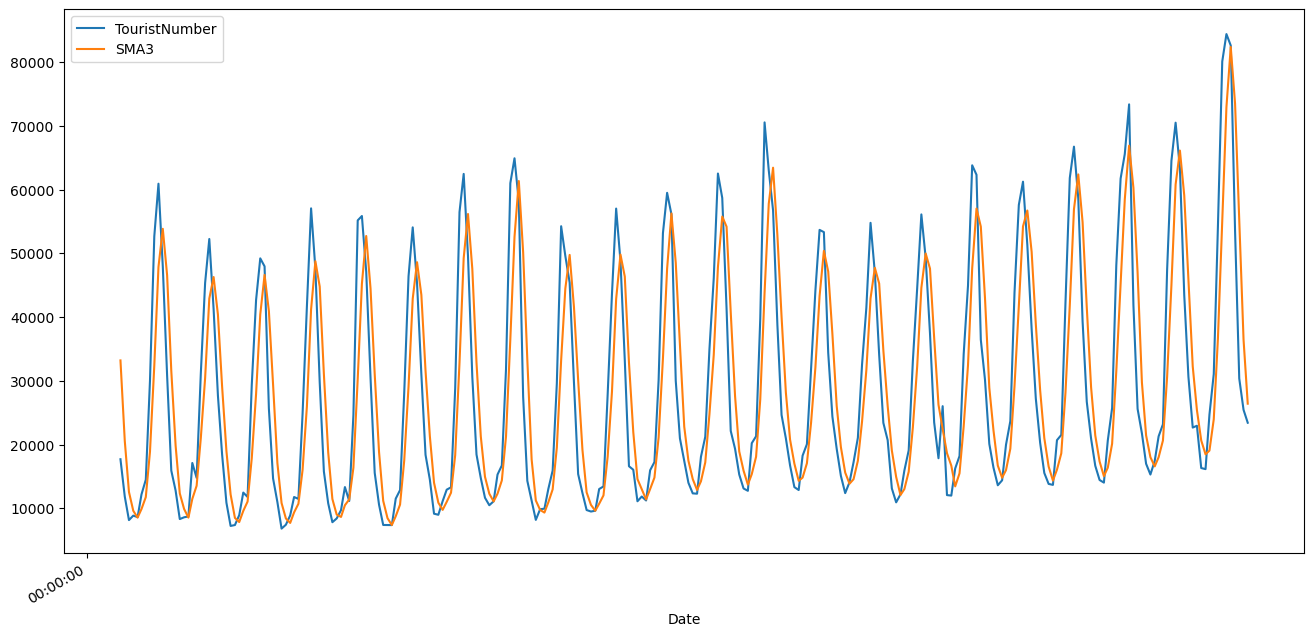

In [15]:
df[['TouristNumber', 'SMA3']].plot(label='DF',figsize=(16, 8))

In [16]:
from scipy.ndimage import uniform_filter1d

moving_average = uniform_filter1d(df, size=3)

moving_average

array([[22521.33333333, 33191.66666667, 45401.33333333, ...,
        19660.66666667, 19994.55555556, 26729.44444444],
       [13785.66666667, 20568.66666667, 33191.66666667, ...,
        30520.        , 21915.22222222, 18041.44444444],
       [ 9375.        , 12556.66666667, 20568.66666667, ...,
        45381.        , 30376.55555556, 19101.11111111],
       ...,
       [38064.66666667, 55475.33333333, 73482.        , ...,
        30615.        , 33311.11111111, 44078.22222222],
       [27077.66666667, 36423.        , 55475.33333333, ...,
        45023.        , 35661.33333333, 32006.66666667],
       [24090.        , 26404.66666667, 36423.        , ...,
        60792.33333333, 46099.88888889, 33398.77777778]])